In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risktools as rt
from loader import _load_json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
up = {"m*": {"user": "", "pass": ""}, "eia": "", "quandl": ""}

up["eia"] = os.getenv("EIA")
up["quandl"] = os.getenv("QUANDL")
up["m*"]["pass"] = os.getenv("MS_PASS")
up["m*"]["user"] = os.getenv("MS_USER")


In [91]:
sims = rt.simOUJ_arr(s0=5,mu=4,theta=3,sigma=0.2,T=1,dt=1/252,sims=1000)

Half-life of theta in days =  58.2243631670354


<AxesSubplot:>

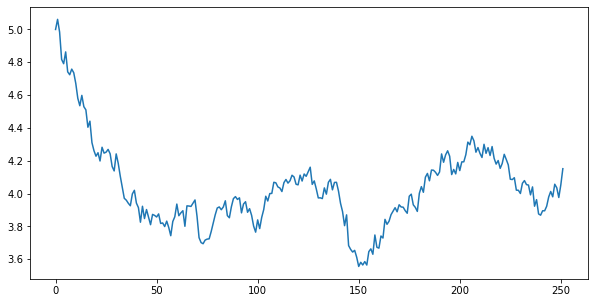

In [93]:
sims.iloc[:,10].plot(figsize=(10,5))

In [68]:
cor = pd.DataFrame([[1,.5],[.5,1]])

In [69]:
cor

,0,1
0,1.0,0.5
1,0.5,1.0


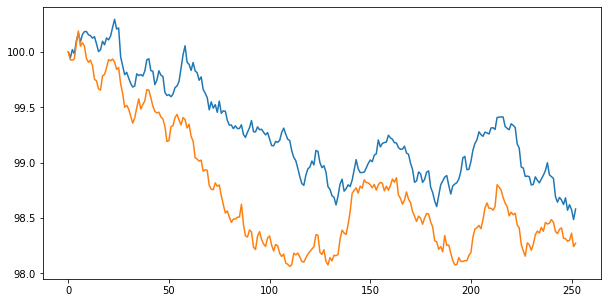

In [86]:
sim = rt.simGBM_MV(s0=[100,100], r=0.0, sigma=[0.1,0.1], T=1, dt=1/252, cor=cor, sims=100)

fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(sim[:,9,0], label="Asset 1")
ax.plot(sim[:,9,1], label="Asset 2")

In [77]:
np.matrix(cor)

matrix([[1. , 0.5],
        [0.5, 1. ]])